<a href="https://colab.research.google.com/github/dhruv369/ComputerVision/blob/master/stable_diffusion_xl_1_0_inpainting_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U diffusers

## Local Inference on GPU
Model page: https://huggingface.co/diffusers/stable-diffusion-xl-1.0-inpainting-0.1

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/diffusers/stable-diffusion-xl-1.0-inpainting-0.1)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
pip install -U diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 101.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 5.0.0
    Uninstalling transformers-5.0.0:
      Successfully uninstalled transformers-5.0.0


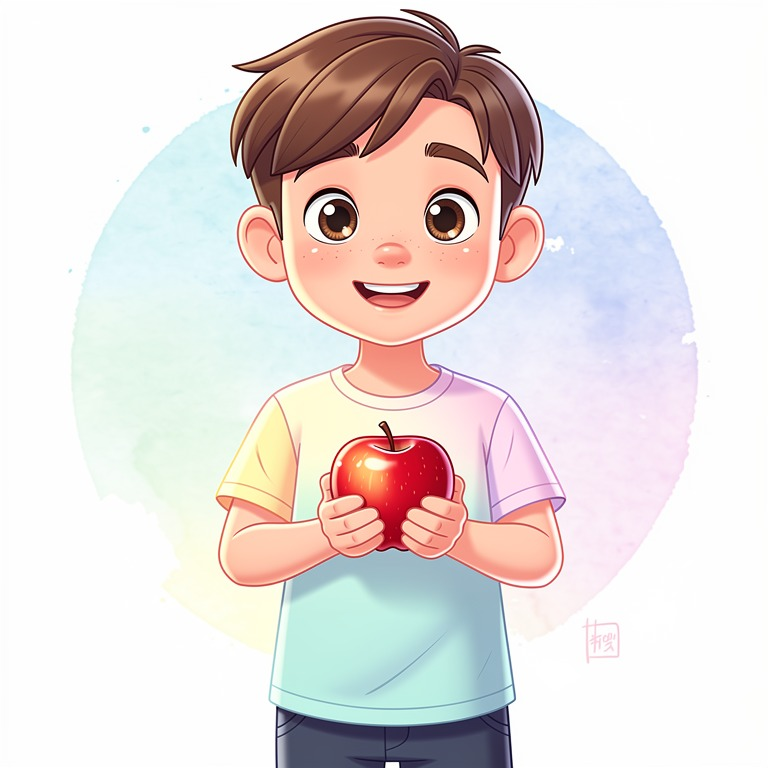

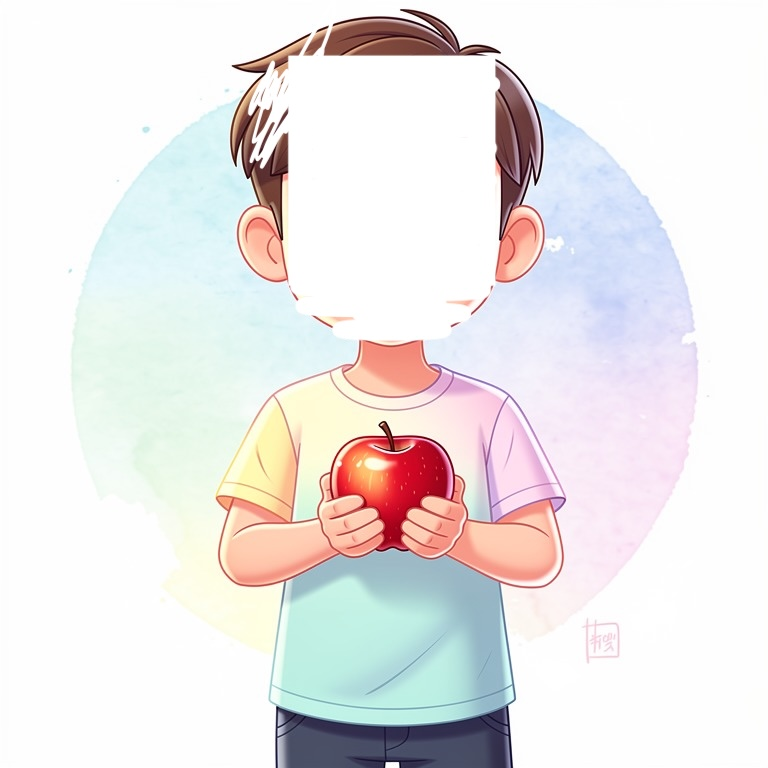

In [7]:
from PIL import Image
from IPython.display import display

init_image = Image.open("/init.png").convert("RGB")
mask_image = Image.open("/mask.png").convert("RGB")

display(init_image)
display(mask_image)

In [9]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
from PIL import Image
from diffusers import StableDiffusionXLInpaintPipeline

device = "cuda"

# Load inpaint pipeline
pipe = StableDiffusionXLInpaintPipeline.from_pretrained(
    "diffusers/stable-diffusion-xl-1.0-inpainting-0.1",
    torch_dtype=torch.float16,
)
pipe.to(device)

# Optional: helps memory on M-series
pipe.enable_attention_slicing()

# Load images
init_image = Image.open("init.png").convert("RGB")
mask_image = Image.open("mask.png").convert("RGB")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"

result = pipe(
    prompt=prompt,
    image=init_image,
    mask_image=mask_image,
    num_inference_steps=30,
    guidance_scale=7.5,
    strength=0.9,   # higher = more change in masked area
)

out = result.images[0]
out.save("inpaint_out.png")
print("Saved inpaint_out.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


KeyboardInterrupt: 